In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.income)
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [4]:
y = le.transform(df.income)
y

array([0, 0, 1, ..., 0, 0, 1])

In [5]:
df.drop(['income'],axis=1,inplace=True)

In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [7]:
df[['educational-num','education','fnlwgt']].groupby(['educational-num','education']).count().reset_index().sort_values('educational-num')

,educational-num,education,fnlwgt
0,1,Preschool,83
1,2,1st-4th,247
2,3,5th-6th,509
3,4,7th-8th,955
4,5,9th,756
5,6,10th,1389
6,7,11th,1812
7,8,12th,657
8,9,HS-grad,15784
9,10,Some-college,10878


In [8]:
df_dummies = pd.get_dummies(df)
df_dummies.shape

(48842, 108)

# Решение в лоб. Все параметы.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,y,test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [11]:
model.fit(X_train,y_train)

C:\Users\sidorov\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
print("Score = {:.10f}".format(model.score(X_test,y_test)))

Score = 0.8038693827


### Score = 0.8038693827

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7479
           1       0.72      0.27      0.39      2290

   micro avg       0.80      0.80      0.80      9769
   macro avg       0.76      0.62      0.64      9769
weighted avg       0.79      0.80      0.77      9769



# Перебор признаков

In [15]:
feature_importance = pd.DataFrame(list(zip(X_test.columns,abs(model.coef_[0]))))
feature_importance.columns = ['feature', 'importance']
feature_importance.sort_values(['importance'], ascending=False).head(10)

,feature,importance
5,hours-per-week,0.009876
0,age,0.005573
35,marital-status_Never-married,0.002823
33,marital-status_Married-civ-spouse,0.002798
53,relationship_Husband,0.002520
2,educational-num,0.002344
64,gender_Female,0.002056
54,relationship_Not-in-family,0.001669
56,relationship_Own-child,0.001521
10,workclass_Private,0.001439


Возьмем N самых зачимых фич, зададим модель и посчитаем score

In [16]:
def make_model(N):
    selected_feature = feature_importance.feature[:N]
    X_train_2 = X_train[selected_feature]
    X_test_2 = X_test[selected_feature]
    model_2 =  LogisticRegression()
    model_2.fit(X_train_2,y_train)
    return model_2.score(X_test_2,y_test)

In [17]:
models=[]
for n in range(1,108):
    models.append([n,make_model(n)])

C:\Users\sidorov\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sidorov\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sidorov\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sidorov\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sidorov\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

C:\Users\sidorov\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sidorov\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sidorov\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sidorov\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sidorov\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

C:\Users\sidorov\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sidorov\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sidorov\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sidorov\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sidorov\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

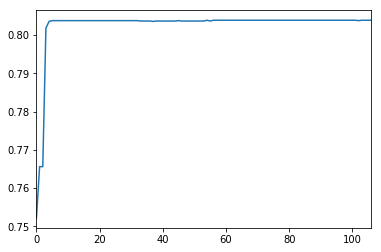

In [26]:
import matplotlib.pyplot as plot
df_models = pd.DataFrame(models)
df_models[1].plot()
plot.show()

 с 55 фитчами модель достигает максимального скора 0.803869

In [22]:
df_models[df_models[1] == df_models[1].max()]

,0,1
54,55,0.803869
56,57,0.803869
57,58,0.803869
58,59,0.803869
59,60,0.803869
60,61,0.803869
61,62,0.803869
62,63,0.803869
63,64,0.803869
64,65,0.803869


In [25]:
df_models.iloc[53, :]

0    54.000000
1     0.803665
Name: 53, dtype: float64